# 概率統計方法

## 簡介

**`Python`** 中常用的統計工具有 **`Numpy, Pandas, PyMC, StatsModels`** 等。

**`Scipy`** 中的子庫 `scipy.stats` 中包含很多統計上的方法。

導入 `numpy` 和 `matplotlib`：

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

`Numpy` 自帶簡單的統計方法：

In [3]:
print 'mean, ', heights.mean()
print 'min, ', heights.min()
print 'max, ', heights.max()
print 'standard deviation, ', heights.std()

mean,  1.756
min,  1.46
max,  2.01
standard deviation,  0.150811140172


導入 **`Scipy`** 的統計模組：

In [4]:
import scipy.stats.stats as st

其他統計量：

In [5]:
print 'median, ', st.nanmedian(heights)    # 忽略nan值之後的中位數
print 'mode, ', st.mode(heights)           # 眾數及其出現次數
print 'skewness, ', st.skew(heights)       # 偏度
print 'kurtosis, ', st.kurtosis(heights)   # 峰度
print 'and so many more...'

median,  1.77
mode,  (array([ 1.88]), array([ 2.]))
skewness,  -0.393524456473
kurtosis,  -0.330672097724
and so many more...


## 概率分佈

常見的[連續概率分佈](https://zh.wikipedia.org/wiki/Category:%E8%BF%9E%E7%BB%AD%E5%88%86%E5%B8%83)有：

- 均勻分佈
- 正態分佈
- 學生`t`分佈
- `F`分佈
- `Gamma`分佈
- ...

[離散概率分佈](https://zh.wikipedia.org/wiki/Category:%E7%A6%BB%E6%95%A3%E5%88%86%E5%B8%83)：

- 伯努利分佈
- 幾何分佈
- ...

這些都可以在 `scipy.stats` 中找到。

## 連續分佈

### 正態分佈

以[正態分佈](https://zh.wikipedia.org/wiki/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)為例，先導入正態分佈：

In [6]:
from scipy.stats import norm

它包含四類常用的函數：

- `norm.cdf` 返回對應的[累計分佈函數](https://zh.wikipedia.org/wiki/%E7%B4%AF%E7%A7%AF%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0)值
- `norm.pdf` 返回對應的[概率密度函數](https://zh.wikipedia.org/wiki/%E6%A9%9F%E7%8E%87%E5%AF%86%E5%BA%A6%E5%87%BD%E6%95%B8)值
- `norm.rvs` 產生指定參數的隨機變數
- `norm.fit` 返回給定數據下，各參數的[最大似然估計](https://zh.wikipedia.org/wiki/%E6%9C%80%E5%A4%A7%E4%BC%BC%E7%84%B6%E4%BC%B0%E8%AE%A1)（MLE）值

從正態分佈產生500個隨機點：

In [7]:
x_norm = norm.rvs(size=500)
type(x_norm)

numpy.ndarray

直方圖：

counts,  [   7.   21.   42.   97.  120.   91.   64.   38.   17.    3.]
bin centers [-2.68067801 -2.13266147 -1.58464494 -1.0366284  -0.48861186  0.05940467
  0.60742121  1.15543774  1.70345428  2.25147082  2.79948735]


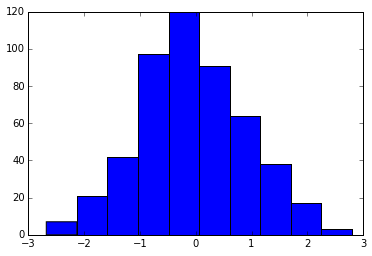

In [8]:
h = hist(x_norm)
print 'counts, ', h[0]
print 'bin centers', h[1]

歸一化直方圖（用出現頻率代替次數），將劃分區間變為 `20`（預設 `10`）：

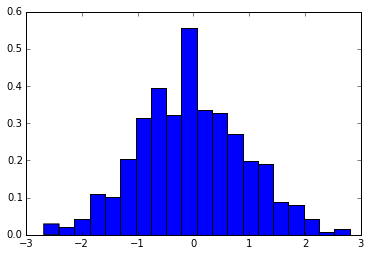

In [9]:
h = hist(x_norm, normed=True, bins=20)

在這組數據下，正態分佈參數的最大似然估計值為：

In [10]:
x_mean, x_std = norm.fit(x_norm)

print 'mean, ', x_mean
print 'x_std, ', x_std

mean,  -0.0426135499965
x_std,  0.950754110144


將真實的概率密度函數與直方圖進行比較：

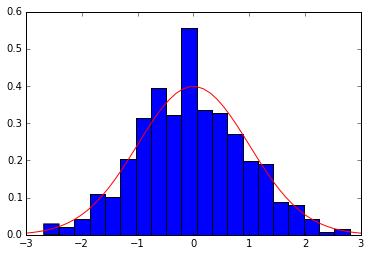

In [11]:
h = hist(x_norm, normed=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

導入積分函數：

In [12]:
from scipy.integrate import trapz 

通過積分，計算落在某個區間的概率大小：

95.45% of the values lie between -2 and 2


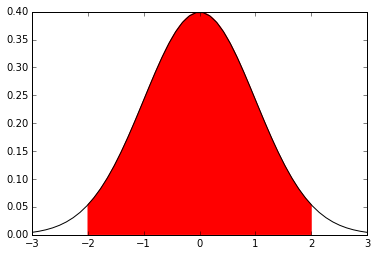

In [13]:
x1 = linspace(-2,2,108)
p = trapz(norm.pdf(x1), x1) 
print '{:.2%} of the values lie between -2 and 2'.format(p)

fill_between(x1, norm.pdf(x1), color = 'red')
plot(x, norm.pdf(x), 'k-')

預設情況，正態分佈的參數為均值0，標準差1，即標準正態分佈。

可以通過 `loc` 和 `scale` 來調整這些參數，一種方法是調用相關函數時進行輸入：

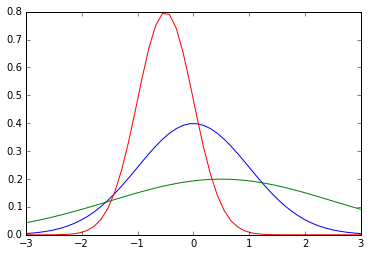

In [14]:
p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=.5))

另一種則是將 `loc, scale` 作為參數直接輸給 `norm` 生成相應的分佈：

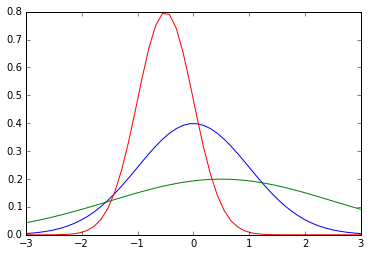

In [15]:
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plot(x, norm(loc=-0.5, scale=.5).pdf(x))

### 其他連續分佈

In [16]:
from scipy.stats import lognorm, t, dweibull

支持與 `norm` 類似的操作，如概率密度函數等。

不同參數的[對數正態分佈](https://zh.wikipedia.org/wiki/%E5%AF%B9%E6%95%B0%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)：

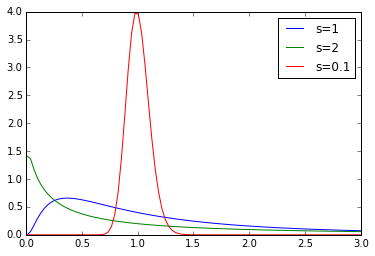

In [17]:
x = linspace(0.01, 3, 100)

plot(x, lognorm.pdf(x, 1), label='s=1')
plot(x, lognorm.pdf(x, 2), label='s=2')
plot(x, lognorm.pdf(x, .1), label='s=0.1')

legend()

不同的[韋氏分佈](https://zh.wikipedia.org/wiki/%E9%9F%A6%E4%BC%AF%E5%88%86%E5%B8%83)：

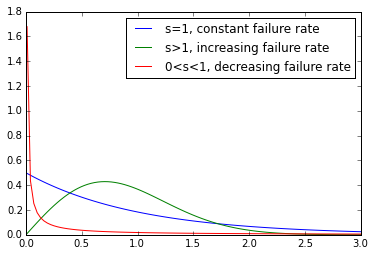

In [18]:
x = linspace(0.01, 3, 100)

plot(x, dweibull.pdf(x, 1), label='s=1, constant failure rate')
plot(x, dweibull.pdf(x, 2), label='s>1, increasing failure rate')
plot(x, dweibull.pdf(x, .1), label='0<s<1, decreasing failure rate')

legend()

不同自由度的[學生 `t` 分佈](https://zh.wikipedia.org/wiki/%E5%AD%A6%E7%94%9Ft-%E5%88%86%E5%B8%83)：

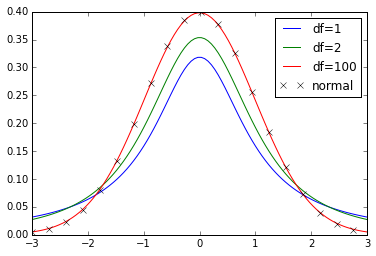

In [19]:
x = linspace(-3, 3, 100)

plot(x, t.pdf(x, 1), label='df=1')
plot(x, t.pdf(x, 2), label='df=2')
plot(x, t.pdf(x, 100), label='df=100')
plot(x[::5], norm.pdf(x[::5]), 'kx', label='normal')

legend()

## 離散分佈

導入離散分佈：

In [20]:
from scipy.stats import binom, poisson, randint

離散分佈沒有概率密度函數，但是有[概率質量函數](https://zh.wikipedia.org/wiki/%E6%A6%82%E7%8E%87%E8%B4%A8%E9%87%8F%E5%87%BD%E6%95%B0)。

[離散均勻分佈](https://zh.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E5%9E%8B%E5%9D%87%E5%8B%BB%E5%88%86%E4%BD%88)的概率質量函數（PMF）：

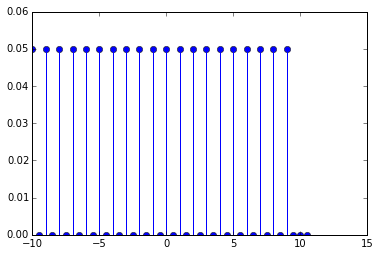

In [21]:
high = 10
low = -10

x = arange(low, high+1, 0.5)
p = stem(x, randint(low, high).pmf(x))  # 桿狀圖

[二項分佈](https://zh.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E4%BD%88)：

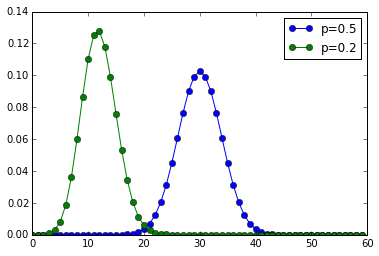

In [22]:
num_trials = 60
x = arange(num_trials)

plot(x, binom(num_trials, 0.5).pmf(x), 'o-', label='p=0.5')
plot(x, binom(num_trials, 0.2).pmf(x), 'o-', label='p=0.2')

legend()

[泊松分佈](https://zh.wikipedia.org/wiki/%E6%B3%8A%E6%9D%BE%E5%88%86%E4%BD%88)：

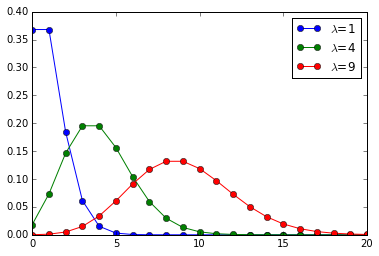

In [23]:
x = arange(0,21)

plot(x, poisson(1).pmf(x), 'o-', label=r'$\lambda$=1')
plot(x, poisson(4).pmf(x), 'o-', label=r'$\lambda$=4')
plot(x, poisson(9).pmf(x), 'o-', label=r'$\lambda$=9')

legend()

## 自定義離散分佈

導入要用的函數：

In [24]:
from scipy.stats import rv_discrete

一個不均勻的骰子對應的離散值及其概率：

In [25]:
xk = [1, 2, 3, 4, 5, 6]
pk = [.3, .35, .25, .05, .025, .025]

定義離散分佈：

In [26]:
loaded = rv_discrete(values=(xk, pk))

此時， `loaded` 可以當作一個離散分佈的模組來使用。

產生兩個服從該分佈的隨機變數：

In [27]:
loaded.rvs(size=2)

array([3, 1])

產生100個隨機變數，將直方圖與概率質量函數進行比較：

<Container object of 3 artists>

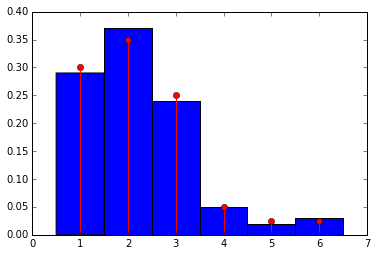

In [28]:
samples = loaded.rvs(size=100)
bins = linspace(.5,6.5,7)

hist(samples, bins=bins, normed=True)
stem(xk, loaded.pmf(xk), markerfmt='ro', linefmt='r-')

## 假設檢驗

導入相關的函數：

- 正態分佈
- 獨立雙樣本 `t` 檢驗，配對樣本 `t` 檢驗，單樣本 `t` 檢驗
- 學生 `t` 分佈

`t` 檢驗的相關內容請參考：
- 百度百科-`t` 檢驗：http://baike.baidu.com/view/557340.htm
- 維基百科-學生 `t` 檢驗：https://en.wikipedia.org/wiki/Student%27s_t-test

In [29]:
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

### 獨立樣本 t 檢驗

兩組參數不同的正態分佈：

In [30]:
n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0, scale=1.0)

從分佈中產生兩組隨機樣本：

In [31]:
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

將兩組樣本混合在一起：

In [32]:
samples = hstack((n1_samples, n2_samples)) 

最大似然參數估計：

In [33]:
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

比較：

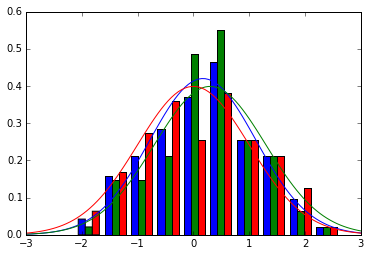

In [34]:
x = linspace(-3,3,100)

hist([samples, n1_samples, n2_samples], normed=True)
plot(x, n.pdf(x), 'b-')
plot(x, n1.pdf(x), 'g-')
plot(x, n2.pdf(x), 'r-')

獨立雙樣本 `t` 檢驗的目的在於判斷兩組樣本之間是否有顯著差異：

In [35]:
t_val, p = ttest_ind(n1_samples, n2_samples)

print 't = {}'.format(t_val)
print 'p-value = {}'.format(p)

t = 0.868384594123
p-value = 0.386235148899


`p` 值小，說明這兩個樣本有顯著性差異。

### 配對樣本 t 檢驗

配對樣本指的是兩組樣本之間的元素一一對應，例如，假設我們有一組病人的數據：

In [36]:
pop_size = 35

pre_treat = norm(loc=0, scale=1)
n0 = pre_treat.rvs(size=pop_size)

經過某種治療後，對這組病人得到一組新的數據：

In [37]:
effect = norm(loc=0.05, scale=0.2)
eff = effect.rvs(size=pop_size)

n1 = n0 + eff

新數據的最大似然估計：

In [38]:
loc, scale = norm.fit(n1)
post_treat = norm(loc=loc, scale=scale)

畫圖：

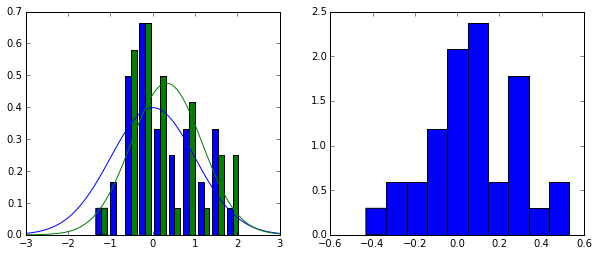

In [39]:
fig = figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
h = ax1.hist([n0, n1], normed=True)
p = ax1.plot(x, pre_treat.pdf(x), 'b-')
p = ax1.plot(x, post_treat.pdf(x), 'g-')

ax2 = fig.add_subplot(1,2,2)
h = ax2.hist(eff, normed=True)

獨立 `t` 檢驗：

In [40]:
t_val, p = ttest_ind(n0, n1)

print 't = {}'.format(t_val)
print 'p-value = {}'.format(p)

t = -0.347904839913
p-value = 0.728986322039


高 `p` 值說明兩組樣本之間沒有顯著性差異。

配對 `t` 檢驗：

In [41]:
t_val, p = ttest_rel(n0, n1)

print 't = {}'.format(t_val)
print 'p-value = {}'.format(p)

t = -1.89564459709
p-value = 0.0665336223673


配對 `t` 檢驗的結果說明，配對樣本之間存在顯著性差異，說明治療時有效的，符合我們的預期。

### `p` 值計算原理 

`p` 值對應的部分是下圖中的紅色區域，邊界範圍由 `t` 值決定。 

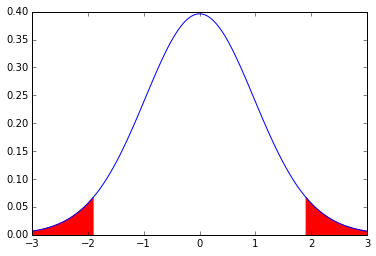

In [42]:
my_t = t(pop_size) # 傳入參數為自由度，這裡自由度為50

p = plot(x, my_t.pdf(x), 'b-')
lower_x = x[x<= -abs(t_val)]
upper_x = x[x>= abs(t_val)]

p = fill_between(lower_x, my_t.pdf(lower_x), color='red')
p = fill_between(upper_x, my_t.pdf(upper_x), color='red')